# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [20]:
if not os.path.exists("lut.py"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

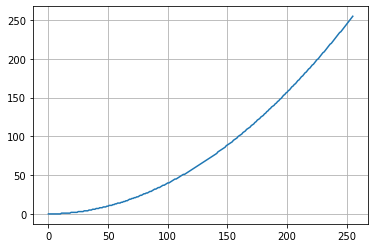

In [21]:
import lut

plt.plot(lut.kwadratowa)
plt.grid()
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

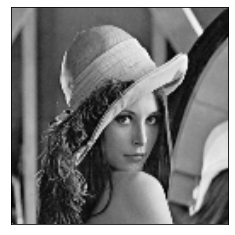

In [22]:
if not os.path.exists("lena.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

IMG = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)

plt.imshow(IMG)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

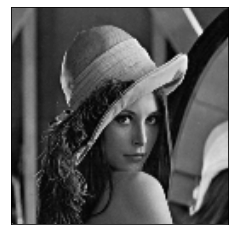

In [23]:
IMG_LUT = cv2.LUT(IMG, lut.wykladnicza)

plt.imshow(IMG_LUT)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [24]:
def LUT(image, look_up_table):
    IMG_LUT = cv2.LUT(image, look_up_table)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

    ax1.set_title("Wykres przekodowania")
    ax2.set_title("Obraz oryginalny")
    ax3.set_title("Obraz przekształcony")

    ax1.plot(look_up_table)
    ax1.set_aspect("equal")
    ax2.imshow(image)
    ax3.imshow(IMG_LUT)

    ax2.set_xticks([])
    ax2.set_yticks([])
    ax3.set_xticks([])
    ax3.set_yticks([])

    fig.tight_layout(pad=3.0)

    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

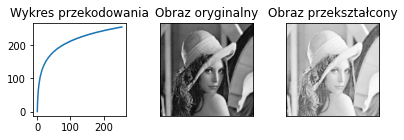

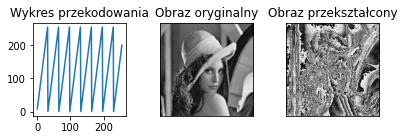

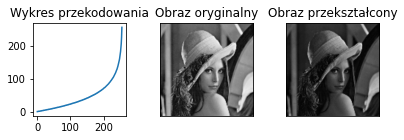

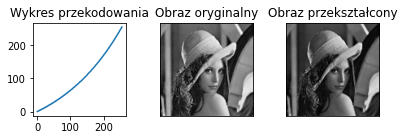

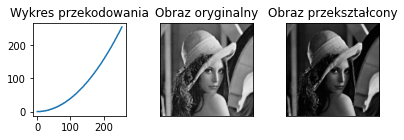

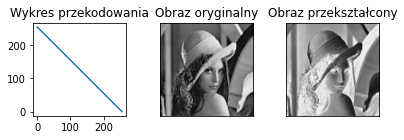

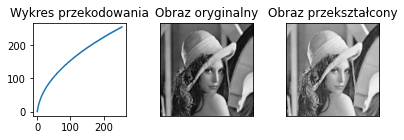

In [25]:
lut_functions = [lut.log, lut.pila, lut.odwlog, lut.wykladnicza, lut.kwadratowa, lut.odwrotna
                 , lut.pierwiastkowa]

for lut in lut_functions:
    LUT(IMG, lut)


## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

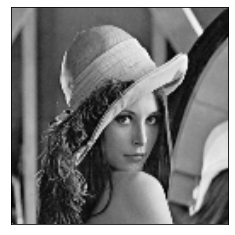

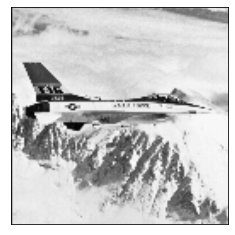

In [26]:
if not os.path.exists("lena.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("jet.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

IMG_LENA = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
IMG_JET = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)

plt.imshow(IMG_LENA)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

plt.imshow(IMG_JET)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

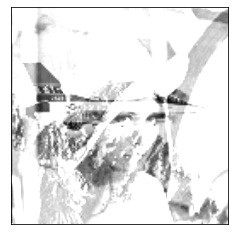

In [27]:
IMG_ADD = cv2.add(IMG_LENA, IMG_JET)

plt.imshow(IMG_ADD)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

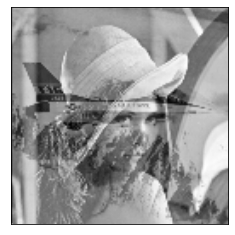

In [28]:
# W powyższym operacji możemy faktycznie zauważyć, że cześć wartości pixeli wychodzi poza zakres
# 255, przez co mają biały kolor. Dlatego przeprowadzimy wyżej opisaną operację.

IMG_LENA_16 = IMG_LENA.astype('uint16')
IMG_JET_16 = IMG_JET.astype('uint16')

IMG_ADD_16 = cv2.add(IMG_LENA_16, IMG_JET_16)

# dzięki normalizacji zmieścimy się w zakresie dla uint8
IMG_ADD_NORM = cv2.normalize(IMG_ADD_16, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
IMG_ADD_8 = IMG_ADD_NORM.astype('uint8')

plt.imshow(IMG_ADD_8)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

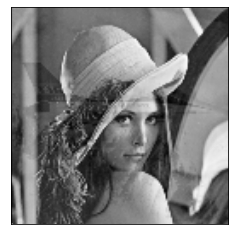

In [29]:
IMG_ADD_WEIGHTED = cv2.addWeighted(IMG_LENA, 0.8, IMG_JET, 0.2, gamma=0)

plt.imshow(IMG_ADD_WEIGHTED)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

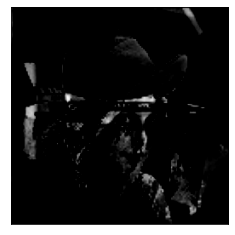

In [30]:
IMG_SUBTRACT = cv2.subtract(IMG_LENA, IMG_JET)

plt.imshow(IMG_SUBTRACT)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()


Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

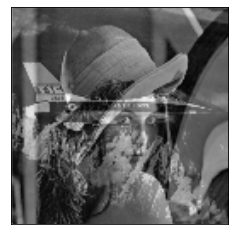

In [31]:
# Wystąpił podobny problem co dla dodawania, lecz tutaj w drugą strone.
# Zakres nie może być mniejszy niż 0  więc mamy czarne pixele.

IMG_LENA_16 = IMG_LENA.astype('int16')
IMG_JET_16 = IMG_JET.astype('int16')

IMG_SUBTRACT_16 = cv2.subtract(IMG_LENA_16, IMG_JET_16)

IMG_SUBTRACT_NORM = cv2.normalize(IMG_SUBTRACT_16, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
IMG_SUBTRACT_ABS = np.abs(IMG_SUBTRACT_NORM)

plt.imshow(IMG_SUBTRACT_ABS)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()


### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

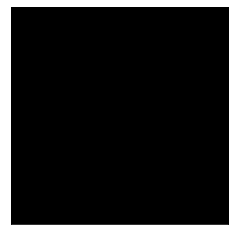

In [32]:
IMG_MUL = cv2.multiply(IMG_LENA, IMG_JET)

plt.imshow(IMG_MUL)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

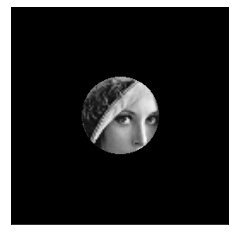

In [33]:
# Powyższy obraz nie daje istotnej informacji ponieważ wymnożenie dwóch wartości
# wykracza poza zakres, więc w konsekwencji otrzymujemy czarny obraz.

if not os.path.exists("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

IMG_KOLO = cv2.imread("kolo.bmp", cv2.IMREAD_GRAYSCALE)
IMG_MASK = IMG_KOLO.astype('bool').astype('uint8')

IMG_LENA_KOLO = cv2.multiply(IMG_LENA, IMG_MASK)

plt.imshow(IMG_LENA_KOLO)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

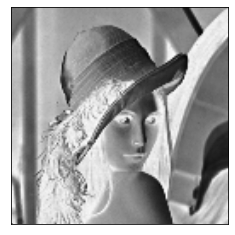

In [34]:
IMG_NEG = cv2.bitwise_not(IMG_LENA)

plt.imshow(IMG_NEG)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()


## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

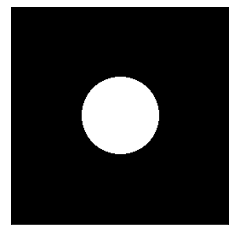

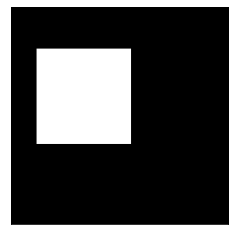

In [35]:
if not os.path.exists("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

if not os.path.exists("kwadrat.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

IMG_KOLO = cv2.imread("kolo.bmp", cv2.IMREAD_GRAYSCALE)
IMG_KWADRAT = cv2.imread("kwadrat.bmp", cv2.IMREAD_GRAYSCALE)

plt.imshow(IMG_KOLO)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

plt.imshow(IMG_KWADRAT)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()


Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

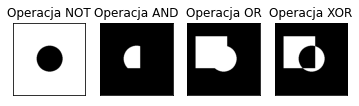

In [36]:
IMG_NOT = cv2.bitwise_not(IMG_KOLO)
IMG_AND = cv2.bitwise_and(IMG_KOLO, IMG_KWADRAT)
IMG_OR = cv2.bitwise_or(IMG_KOLO, IMG_KWADRAT)
IMG_XOR = cv2.bitwise_xor(IMG_KOLO, IMG_KWADRAT)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.set_title("Operacja NOT")
ax2.set_title("Operacja AND")
ax3.set_title("Operacja OR")
ax4.set_title("Operacja XOR")

ax1.imshow(IMG_NOT)
ax2.imshow(IMG_AND)
ax3.imshow(IMG_OR)
ax4.imshow(IMG_XOR)

for axis in (ax1, ax2, ax3, ax4):
    axis.set_xticks([])
    axis.set_yticks([])

plt.show()
